In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [25]:
FOLDER = "pokemons/" # folder to save the pokemons
TOTAL_POKEMONS = 25 # total number of pokemons

In [3]:
def load_pkm_json(json_file_path):
    with open(json_file_path) as f:
        data = json.load(f)
    return data

In [15]:
def get_pkm_data(pkm):
    data = {}
    data["id"] = pkm["id"]
    data["name"] = pkm["name"]
    data["height"] = pkm["height"]
    data["weight"] = pkm["weight"]
    return data

In [26]:
def load_pkms():
    pkms = []
    for i in range(1, TOTAL_POKEMONS):
        pkm = load_pkm_json(FOLDER + str(i) + ".json")
        pkms.append(get_pkm_data(pkm))
    return pd.DataFrame(pkms)

In [27]:
df_pkms = load_pkms()

In [28]:
df_pkms.head()

,id,name,height,weight
0,1,bulbasaur,7,69
1,2,ivysaur,10,130
2,3,venusaur,20,1000
3,4,charmander,6,85
4,5,charmeleon,11,190


<Axes: xlabel='height', ylabel='weight'>

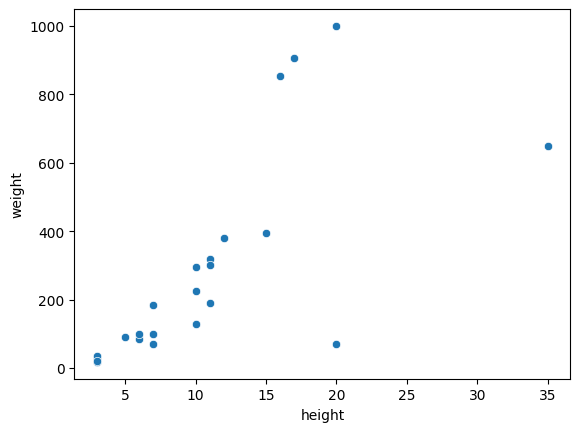

In [31]:
# Plotting the height and weight of the pokemons
sns.scatterplot(x="height", y="weight", data=df_pkms)